# RNA seq Analysis

In [241]:
import subprocess
import os
import pandas as pd
from pygenome import sg
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings('ignore')

In [32]:
project_dir = "/Users/scampione/Projects/Buck_Institute/RNA"
os.chdir(project_dir) # Set the directory for project

hisat_ref_genome = "/Users/scampione/Projects/Buck_Institute/RNA/r64_tran/genome_tran"
gtf_file = "/Users/scampione/Projects/Buck_Institute/RNA/Saccharomyces_cerevisiae.R64-1-1.111.gtf"

sra_accession = "SRR8690267" # SRA accession number for sample we want

## (1) **Data Acquisition**

#### *Download RNA-seq data*

In [ ]:
def download_sra_data(sra_accession):
    """
    * Downloads the RNA-seq data from NCBI
    * Software: SRAtoolkit
    """
    subprocess.run(["fasterq-dump", sra_accession, "--split-files", "--threads", "8", "-O", project_dir])


download_sra_data(sra_accession)

#### *Run Quality Control*

In [5]:
def run_fastqc():
    """
    * Get quality control report on RNA reads
    * Software: FastQC
    """
    subprocess.run(["fastqc", f"{sra_accession}_1.fastq"])
    subprocess.run(["fastqc", f"{sra_accession}_2.fastq"])


run_fastqc()

null


Started analysis of SRR8690267_1.fastq
Approx 5% complete for SRR8690267_1.fastq
Approx 10% complete for SRR8690267_1.fastq
Approx 15% complete for SRR8690267_1.fastq
Approx 20% complete for SRR8690267_1.fastq
Approx 25% complete for SRR8690267_1.fastq
Approx 30% complete for SRR8690267_1.fastq
Approx 35% complete for SRR8690267_1.fastq
Approx 40% complete for SRR8690267_1.fastq
Approx 45% complete for SRR8690267_1.fastq
Approx 50% complete for SRR8690267_1.fastq
Approx 55% complete for SRR8690267_1.fastq
Approx 60% complete for SRR8690267_1.fastq
Approx 65% complete for SRR8690267_1.fastq
Approx 70% complete for SRR8690267_1.fastq
Approx 75% complete for SRR8690267_1.fastq
Approx 80% complete for SRR8690267_1.fastq
Approx 85% complete for SRR8690267_1.fastq
Approx 90% complete for SRR8690267_1.fastq
Approx 95% complete for SRR8690267_1.fastq


Analysis complete for SRR8690267_1.fastq
null


Started analysis of SRR8690267_2.fastq
Approx 5% complete for SRR8690267_2.fastq
Approx 10% complete for SRR8690267_2.fastq
Approx 15% complete for SRR8690267_2.fastq
Approx 20% complete for SRR8690267_2.fastq
Approx 25% complete for SRR8690267_2.fastq
Approx 30% complete for SRR8690267_2.fastq
Approx 35% complete for SRR8690267_2.fastq
Approx 40% complete for SRR8690267_2.fastq
Approx 45% complete for SRR8690267_2.fastq
Approx 50% complete for SRR8690267_2.fastq
Approx 55% complete for SRR8690267_2.fastq
Approx 60% complete for SRR8690267_2.fastq
Approx 65% complete for SRR8690267_2.fastq
Approx 70% complete for SRR8690267_2.fastq
Approx 75% complete for SRR8690267_2.fastq
Approx 80% complete for SRR8690267_2.fastq
Approx 85% complete for SRR8690267_2.fastq
Approx 90% complete for SRR8690267_2.fastq
Approx 95% complete for SRR8690267_2.fastq


Analysis complete for SRR8690267_2.fastq


#### *FastQC Report Parsing*

In [24]:
from bs4 import BeautifulSoup

print("SRR8690267_1_fastqc.html")
with open("SRR8690267_1_fastqc.html", "r") as file:
    html_report = file.read()

soup = BeautifulSoup(html_report, 'html.parser')

basic_stats_table = soup.find('table')

rows = basic_stats_table.find_all('tr')

basic_stats = {}
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        key = cols[0].text.strip()
        value = cols[1].text.strip()
        basic_stats[key] = value

for i in basic_stats.items():
    print(i)


print("\nSRR8690267_2_fastqc.html")
with open("SRR8690267_2_fastqc.html", "r") as file:
    html_report = file.read()

soup = BeautifulSoup(html_report, 'html.parser')


basic_stats_table = soup.find('table')
rows = basic_stats_table.find_all('tr')


basic_stats = {}
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1:
        key = cols[0].text.strip()
        value = cols[1].text.strip()
        basic_stats[key] = value

# Now `basic_stats` dictionary contains all the information from the 'Basic Statistics' section
for i in basic_stats.items():
    print(i)


SRR8690267_1_fastqc.html
('Filename', 'SRR8690267_1.fastq')
('File type', 'Conventional base calls')
('Encoding', 'Sanger / Illumina 1.9')
('Total Sequences', '25995531')
('Total Bases', '1.2 Gbp')
('Sequences flagged as poor quality', '0')
('Sequence length', '50')
('%GC', '41')

SRR8690267_2_fastqc.html
('Filename', 'SRR8690267_2.fastq')
('File type', 'Conventional base calls')
('Encoding', 'Sanger / Illumina 1.9')
('Total Sequences', '25995531')
('Total Bases', '1.2 Gbp')
('Sequences flagged as poor quality', '0')
('Sequence length', '50')
('%GC', '41')


Quality reports of both strands seem good.

## (2) **Alignment with HISAT2**

In [29]:
def run_hisat2():
    """
    * Align the reads to the reference genome using HISAT2
    * Software: HISAT2
    """
    subprocess.run(["hisat2", "-p", "8", "-x", hisat_ref_genome, "-1", f"{sra_accession}_1.fastq", "-2", f"{sra_accession}_2.fastq", "-S", f"{sra_accession}.sam"])


run_hisat2()

25995531 reads; of these:
  25995531 (100.00%) were paired; of these:
    998409 (3.84%) aligned concordantly 0 times
    23429449 (90.13%) aligned concordantly exactly 1 time
    1567673 (6.03%) aligned concordantly >1 times
    ----
    998409 pairs aligned concordantly 0 times; of these:
      141775 (14.20%) aligned discordantly 1 time
    ----
    856634 pairs aligned 0 times concordantly or discordantly; of these:
      1713268 mates make up the pairs; of these:
        1252374 (73.10%) aligned 0 times
        399896 (23.34%) aligned exactly 1 time
        60998 (3.56%) aligned >1 times
97.59% overall alignment rate


97.59% overall alignment rate is great!


## (3) **Post-Alignment Processing**

#### *Convert, Sort, and Index BAM Files*


In [30]:
def process_bam():
    """
    * Convert SAM to BAM, sort and index BAM file
    * Software: SAMtools
    """
    subprocess.run(["samtools", "view", "-bS", f"{sra_accession}.sam", "-o", f"{sra_accession}.bam"])
    subprocess.run(["samtools", "sort", f"{sra_accession}.bam", "-o", f"{sra_accession}_sorted.bam"])
    subprocess.run(["samtools", "index", f"{sra_accession}_sorted.bam"])


process_bam()

[bam_sort_core] merging from 15 files and 1 in-memory blocks...


## (4) **Read Counting with featureCounts**


In [33]:
def run_feature_counts():
    """
    * Quantify the reads to get gene expression levels
    * Software: FeatureCounts
    """    
    subprocess.run(["featureCounts", "-T", "8", "-p", "-a", gtf_file, "-o", "gene_counts.txt", f"{sra_accession}_sorted.bam"])



run_feature_counts() # added -p bc paried


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 1 BAM file                                       ||
||                           o SRR8690267_sorted.bam                          ||
||                                                                            ||
||             Output file : gene_counts.txt                                  ||
||                 Summary : gene_counts.txt.summary             

## (5) **Normalization of Read Counts**


In [204]:
gene_counts_file = "/Users/scampione/Projects/Buck_Institute/RNA/gene_counts.txt"

gene_counts_df = pd.read_csv(gene_counts_file, sep='\t', comment='#') 
gene_counts_df.head()

,Geneid,Chr,Start,End,Strand,Length,SRR8690267_sorted.bam
0,YDL246C,IV,8683,9756,-,1074,7
1,YDL243C,IV,17577,18566,-,990,552
2,YDR387C,IV,1248154,1249821,-,1668,822
3,YDL094C,IV,289572,290081,-,510,18
4,YDR438W,IV,1338274,1339386,+,1113,838


In [205]:
gene_counts_df.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', 'Count']

#### *Calculate TPM*


In [206]:
gene_counts_df['RPK'] = gene_counts_df['Count'] / (gene_counts_df['Length'] / 1000) # Calculate RPK

# Sum of RPKs
sum_rpk = gene_counts_df['RPK'].sum()

# Calculate TPM
gene_counts_df['TPM'] = gene_counts_df['RPK'] / sum_rpk * 1e6

## (6) **Analysis of Paralogous Genes**


#### *Mapping Standard Gene Names to Gene IDs*


In [207]:
prlgs = ["RPL1A","RPL1B","RPL2A","RPL2B","RPL12A","RPL12B","RPL18A","RPL18B","RPL19A","RPL19B",
         "RPL20A","RPL20B","RPL23A","RPL23B","RPL35A","RPL35B","RPL40A","RPL40B","RPL41A","RPL41B",
         "RPL42A","RPL42B","RPL43A","RPL43B","RPS4A","RPS4B","RPS6A","RPS6B","RPS8A","RPS8B","RPS11A",
         "RPS11B","RPS16A","RPS16B","RPS18A","RPS18B","RPS23A","RPS23B","RPS24A","RPS24B","RPS30A",
         "RPS30B"]


prlgs_dct = {str(sg.stdgene[mygene]).split('/')[-1]: str(sg.stdgene[mygene]).split(' ')[1].split('/')[0] for mygene in prlgs}

prlgs_gene_ids = list(prlgs_dct.keys())

In [208]:
filtered_df = gene_counts_df[gene_counts_df['Geneid'].isin(prlgs_gene_ids)]

filtered_df['Standard_Gene_Name'] = filtered_df['Geneid'].map(prlgs_dct)

sorted_df = filtered_df.sort_values(by='Standard_Gene_Name')

sorted_df

,Geneid,Chr,Start,End,Strand,Length,Count,RPK,TPM,Standard_Gene_Name
5639,YEL054C,V,52721,53218,-,498,10265,20612.449799,842.888367,RPL12A
366,YDR418W,IV,1301616,1302113,+,498,9838,19755.020080,807.826182,RPL12B
937,YOL120C,XV;XV,93395;94291,93843;94402,-;-,561,43088,76805.704100,3140.754018,RPL18A
4419,YNL301C,XIV;XIV,63570;64451,64018;64562,-;-,561,11086,19761.140820,808.076472,RPL18B
4155,YBR084C-A,II;II,414186;415260,414753;415261,-;-,570,30670,53807.017544,2200.287186,RPL19A
4015,YBL027W,II;II,168423;168809,168424;169376,+;+,570,45115,79149.122807,3236.581558,RPL19B
3064,YPL220W,XVI,135790,136443,+,654,18472,28244.648318,1154.985736,RPL1A
2062,YGL135W,VII,254641,255294,+,654,27520,42079.510703,1720.723661,RPL1B
3608,YMR242C,XIII,753225,753742,-,518,28692,55389.961390,2265.017238,RPL20A
1234,YOR312C,XV,900250,900767,-,518,30836,59528.957529,2434.269886,RPL20B


#### *Calculate Differences in TPM*


In [184]:
prlg_pairs = [(base_gene+"A", base_gene+"B") for base_gene in {prlg[:-1] for prlg in prlgs}]

diff_df = pd.DataFrame(columns=["ParalogA", "ParalogB", "TPM_Difference(A-B)"])
p1s, p2s, diffs = [], [], []


for paralog1, paralog2 in prlg_pairs:
    count_p1 = sorted_df[sorted_df["Standard_Gene_Name"] == paralog1]['TPM'].values[0]
    count_p2 = sorted_df[sorted_df["Standard_Gene_Name"] == paralog2]['TPM'].values[0]
    
    diff = count_p1 - count_p2
    
    diffs.append(diff)
    p1s.append(paralog1) 
    p2s.append(paralog2)

diff_df['ParalogA'] = p1s
diff_df['ParalogB'] = p2s
diff_df['TPM_Difference(A-B)'] = diffs

diff_df

,ParalogA,ParalogB,TPM_Difference(A-B)
0,RPL23A,RPL23B,-572.885858
1,RPL18A,RPL18B,2332.677546
2,RPL2A,RPL2B,-1042.350131
3,RPS8A,RPS8B,286.516641
4,RPL42A,RPL42B,-917.080777
5,RPS24A,RPS24B,150.940317
6,RPL41A,RPL41B,2620.246191
7,RPS18A,RPS18B,-726.694221
8,RPL35A,RPL35B,-683.339035
9,RPL20A,RPL20B,-169.252647


In [183]:
# Save Output to Excel
diff_df.to_excel("paralogs_diff_TPM.xlsx", index=False)
sorted_df.to_excel("paralogs_gene_quantification.xlsx", index=False)

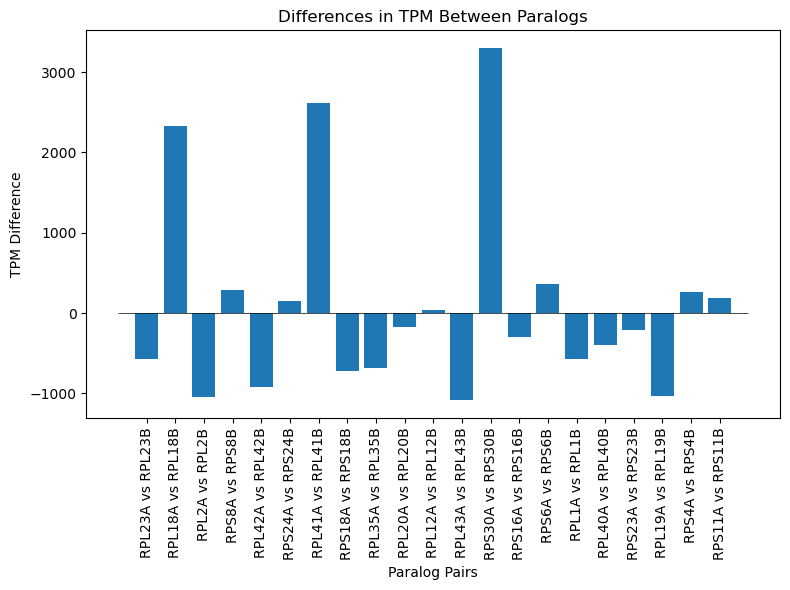

In [201]:
plt.figure(figsize=(8, 6))
plt.bar(diff_df.index, diff_df['TPM_Difference(A-B)'])
plt.xlabel('Paralog Pairs')
plt.ylabel('TPM Difference')
plt.title('Differences in TPM Between Paralogs')
plt.xticks(diff_df.index, labels=diff_df['ParalogA'] + ' vs ' + diff_df['ParalogB'], rotation=90)
plt.hlines(y=0, xmin=-1, xmax=21, colors='black', linewidth=.5)
plt.tight_layout()
plt.show()


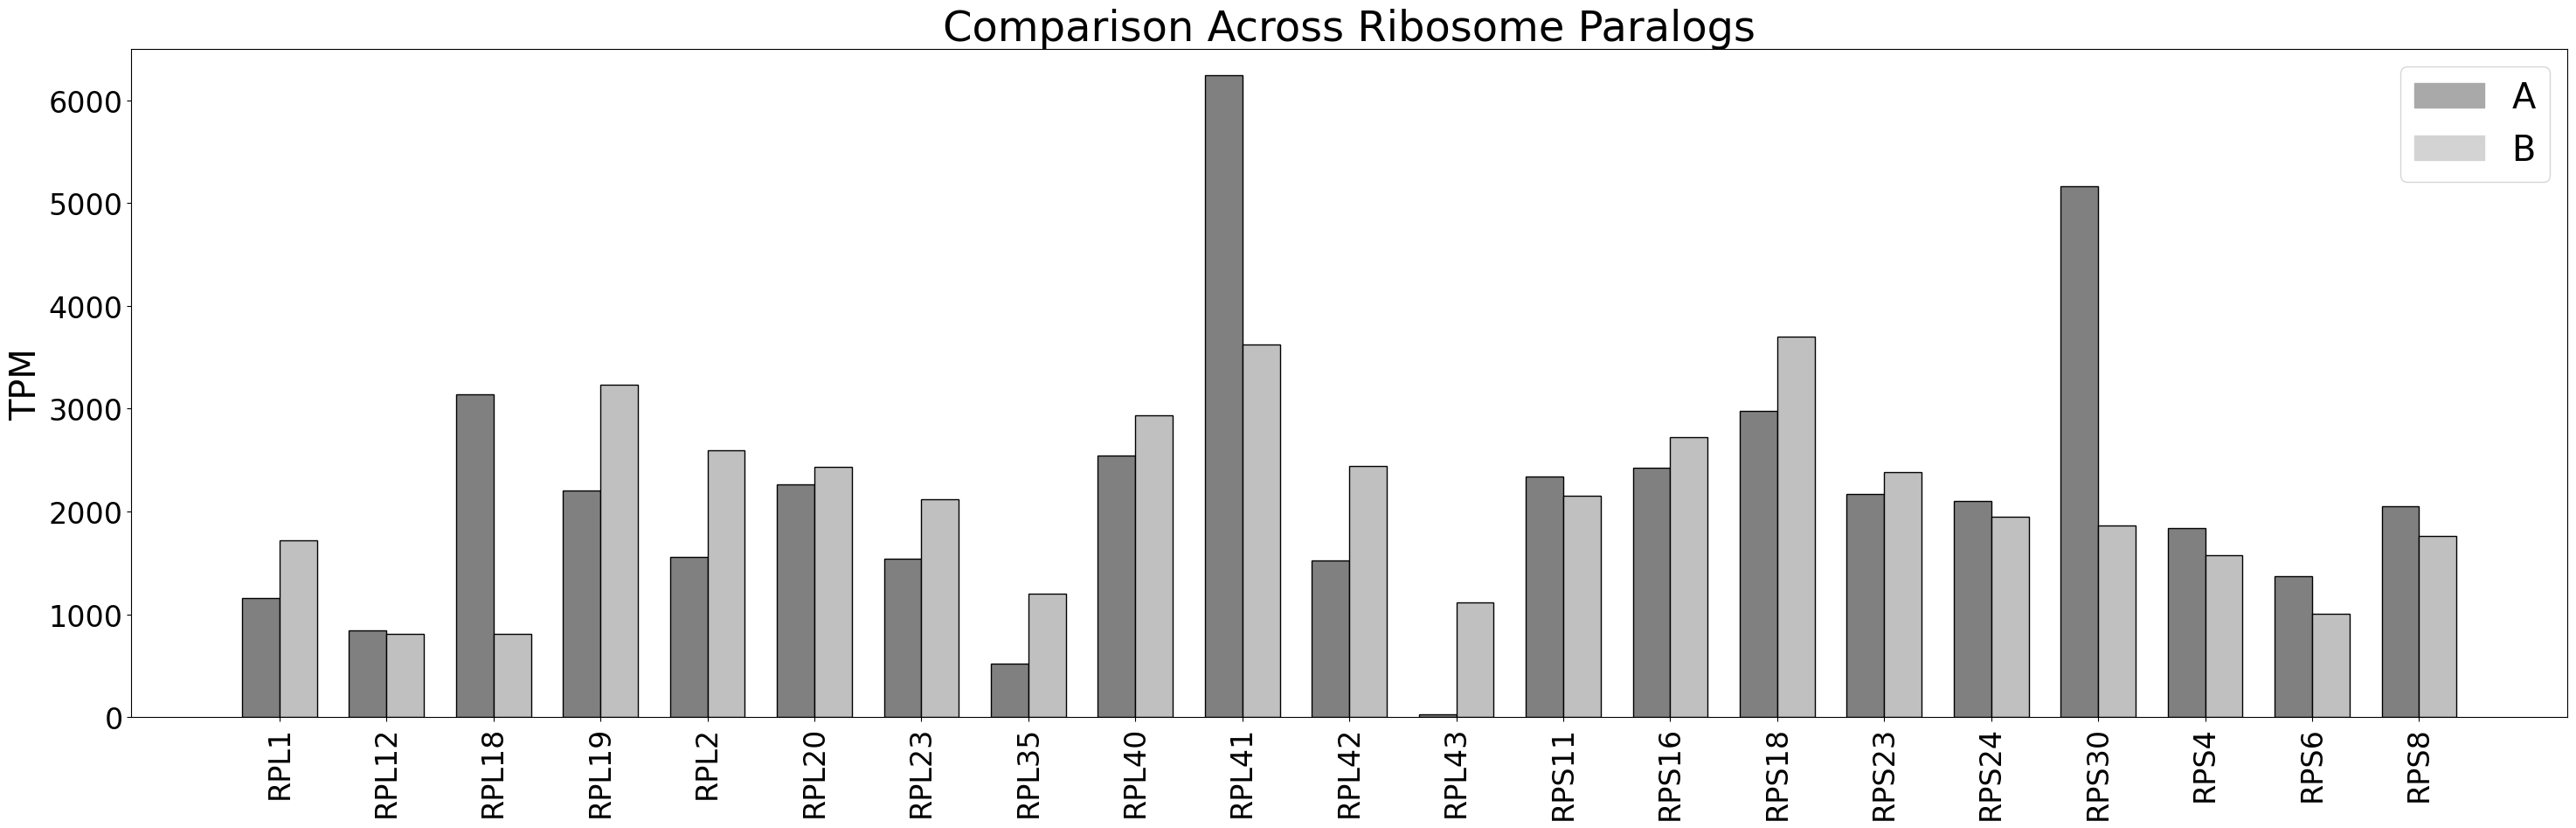

In [269]:
grouped = sorted_df.groupby('Base_Gene_Name')


plt.rcParams.update({'font.size': 24})
plt.figure(figsize=(30, 10))

# Create custom legend patches
legend_patches = [mpatches.Patch(color='darkgray', label='A'),
                  mpatches.Patch(color='lightgray', label='B')]

bar_width = 0.35

for i, (base_gene_name, group) in enumerate(grouped):
    plt.bar(i, group[group['Paralog_Distinction'] == 'A']['TPM'], color='gray', width=bar_width, edgecolor='black')
    plt.bar(i + bar_width, group[group['Paralog_Distinction'] == 'B']['TPM'], color='#C0C0C0', width=bar_width, edgecolor='black')

plt.xticks([r + bar_width/2 for r in range(len(grouped))], [name for name, _ in grouped], rotation=90)


plt.legend(handles=legend_patches, fontsize='large')


plt.ylabel('TPM', fontsize='large')
plt.title('Comparison Across Ribosome Paralogs', fontsize='x-large')
plt.ylim(0, 6500)

plt.tight_layout()
plt.savefig("tpm_across_ribosome_paralogs.png")
plt.show()
